In [1]:
import os.path as op 
import xarray as xr 
import numpy as np 
from projection_test import SUBIDS, loadnii, loadfunc, OUTROOT
from analysis_scripts import x_array
import itertools 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = np.array(plt.get_cmap('tab20').colors)
TESTS = ['flat', 'sine', 'rand']
METHODS = ['tob', 'tob_sp', 'wb', 'wb_sp']
MASKED_RMS = lambda a,b,mask: np.sqrt(((a[mask] - b[mask])**2).mean())

/home/ibmeuser/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ibmeuser/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
N_SUBS = 20 
vsv = x_array(coords={'sub': range(N_SUBS), 'test': TESTS, 'meth': METHODS})

for idx,sub in enumerate(SUBIDS()[:N_SUBS]):
    for test in TESTS: 
        truth = loadnii(op.join(OUTROOT, sub, '%s.nii.gz' % test))
        mask = (truth > 0)
        for meth in METHODS: 
            comp = loadnii(op.join(OUTROOT, sub, '%s_v2s2v_%s.nii.gz' % (test,meth)))
            vsv.loc[idx,test,meth] = MASKED_RMS(truth, comp, mask)

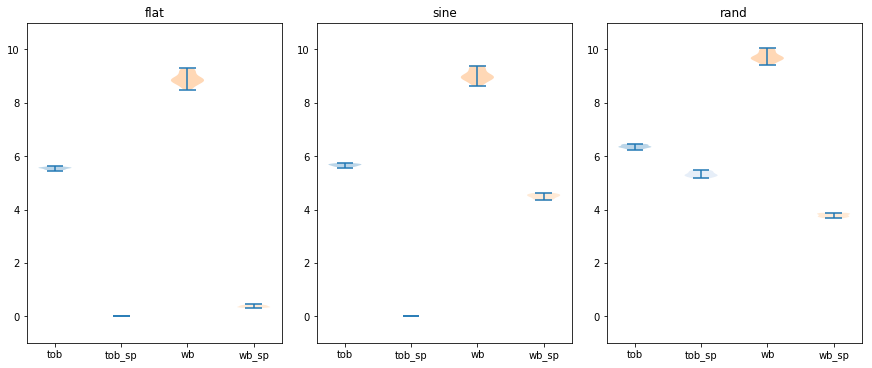

In [8]:
fig, axes = plt.subplots(1,3, constrained_layout=True)
fig.set_size_inches(12,5)
for idx,ax in enumerate(axes):
    ax.set_title(TESTS[idx])
    violins = ax.violinplot(vsv[:,idx,:].T)
    [ v.set_facecolor(cmap[idx,:]) for idx,v in enumerate(violins['bodies']) ] 
    ax.set_xticks(range(1,5))
    ax.set_xticklabels(METHODS)
    ax.set_ylim(-1, 11)
    
plt.show()

In [59]:
%qtconsole